# Influence of the coordinate mapping parameters: case study of the ErfKGCoordMap

Another important set of parameters when solving Hamiltonians numerically with SiegPy is the choice of the coordinate mapping. There are many coordinate mappings available in the SiegPy module, but let us focus first on one type of smooth, exterior coordinate mapping, namely the `ErfKGCoordMap`.

This type of coordinate mapping depends on three parameters:

- the complex scaling angle $\theta$,

- the inflexion point $x_0$,

- the sharpness parameter $\lambda$.

The goal of the present notebook is to witness the influence of these parameters on the numerical spectrum obtained after the Hamiltonian diagonalization.

## Initialization

The initialization consists in importing the relevant modules and classes and defining a potential that will be used throuhout the notebook.

### Import some modules and classes

In [25]:
from siegpy import (Hamiltonian, SWPotential, SWPBasisSet,
                    ErfKGCoordMap)
import numpy as np
import matplotlib.pyplot as plt

### Define a potential

In [2]:
# The potential is read from a file...
siegerts = SWPBasisSet.from_file("siegerts.dat")
pot = siegerts.potential
# ... and then discretized over a grid
l = pot.width
xmax = 7.5
xgrid = np.linspace(-xmax, xmax, 501)
pot.grid = xgrid

## Influence of $\theta$

Let us first look at the influence of the $\theta$ parameter by varying it, while the other parameters are constant.

### Define the coordinate mappings

In [3]:
thetas = [0.2, 0.4, 0.6, 0.8, 1.0]
x0 = 6.0
lbda = 1.5
cms_tta = [ErfKGCoordMap(theta, x0, lbda, grid=xgrid) for theta in thetas]

All the coordinate mappings are plotted below:

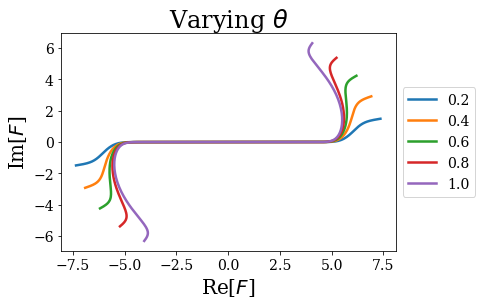

In [30]:
for i, cm in enumerate(cms_tta):
    lab = str(cm.theta)
    plt.plot(np.real(cm.values), np.imag(cm.values), label=lab)
    plt.xlabel("Re[$F$]")
    plt.ylabel("Im[$F$]")
    plt.title(r"Varying $\theta$")
    plt.legend(loc=6, bbox_to_anchor=(1, .5))
plt.show()

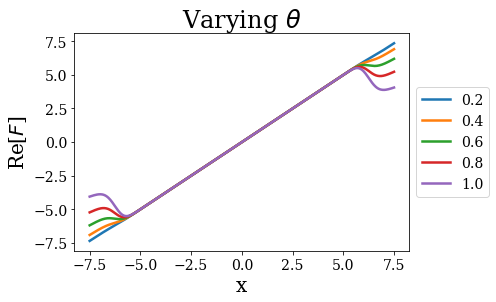

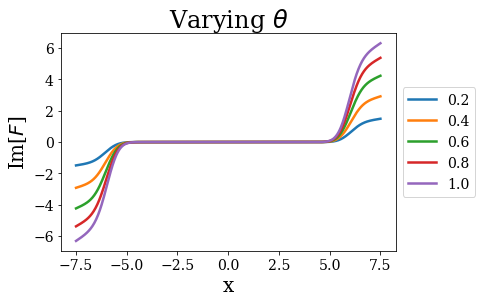

In [41]:
for part in [{"str": "Re", "func": np.real},
             {"str": "Im", "func": np.imag}]:
    for i, cm in enumerate(cms_tta):
        lab = str(cm.theta)
        plt.plot(cm.grid, part["func"](cm.values), label=lab)
        plt.xlabel("x")
        plt.ylabel(part["str"]+"[$F$]")
        plt.title(r"Varying $\theta$")
        plt.legend(loc=6, bbox_to_anchor=(1, .5))
    plt.show()

### Define the Hamiltonians

In [4]:
hams_tta = [Hamiltonian(pot, cm) for cm in cms_tta]

### Solve the Hamiltonians

In [5]:
basissets_tta = [ham.solve() for ham in hams_tta]

### Compare the results

Let us first have a look at the global picture, by plotting the energies and virial expectation values of all the eigenstates:

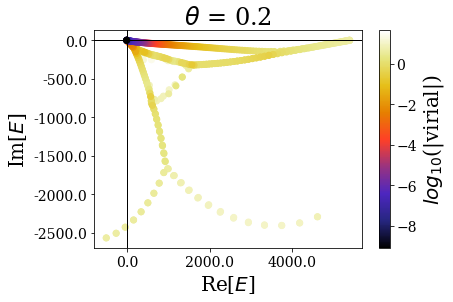

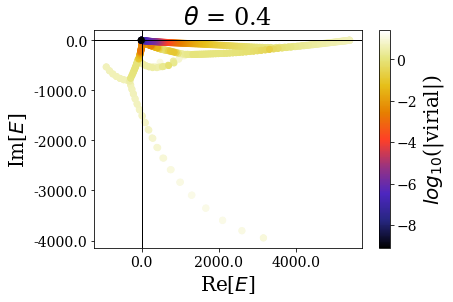

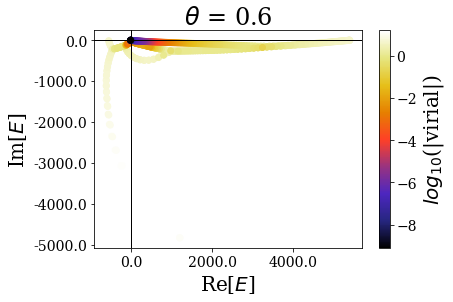

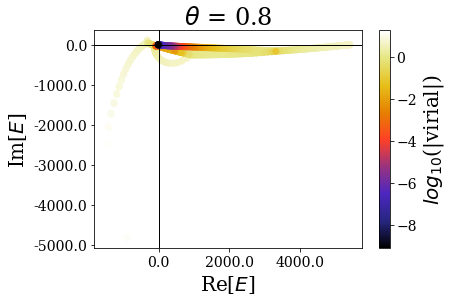

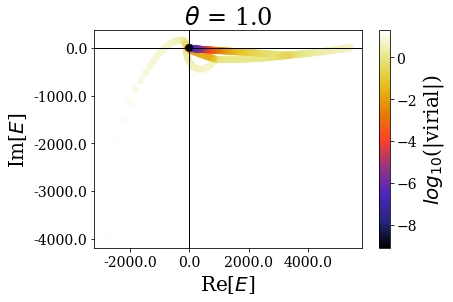

In [6]:
for basis in basissets_tta:
    tit = r"$\theta$ = {}".format(basis.coord_map.theta)
    basis.plot_energies(title=tit)

While the overall distibution of energies in the complex energy plane is modified by the complex scaling angle $\theta$, the virial expectation values seem to be consistent over the whole range of angles. In particular, the resonant states do not seem to be largely affected by the angle modification. Let us zoom in for a clearer view:

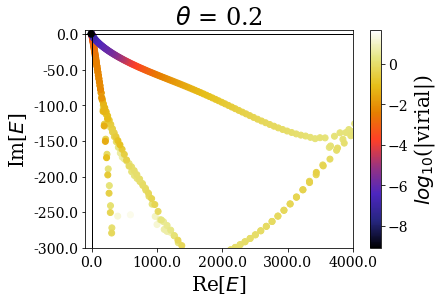

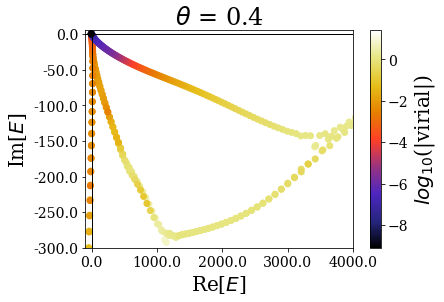

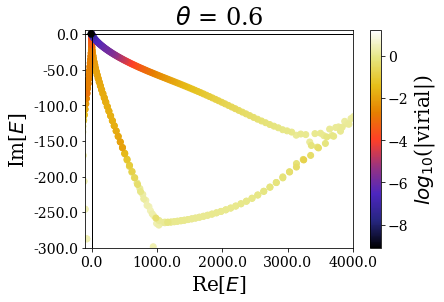

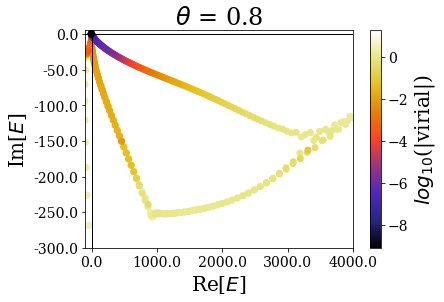

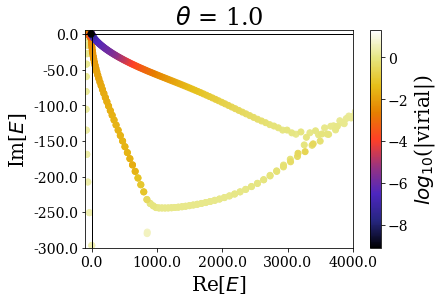

In [7]:
for basis in basissets_tta:
    tit = r"$\theta$ = {}".format(basis.coord_map.theta)
    basis.plot_energies(xlim=(-100, 4000), ylim=(-300, 5), title=tit)

The highest energy resonant states seem to be unaffected by the complex scaling angle. Let us zoom in again, to look at what happens close to the 0 energy:

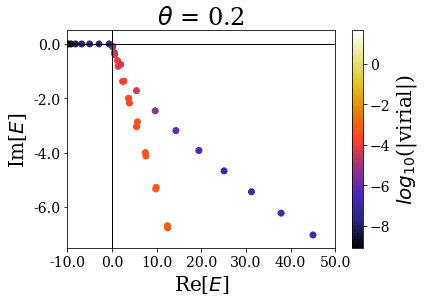

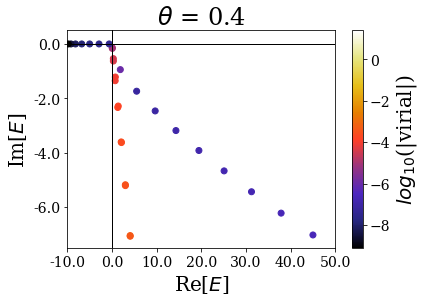

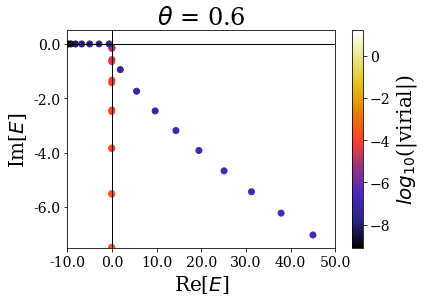

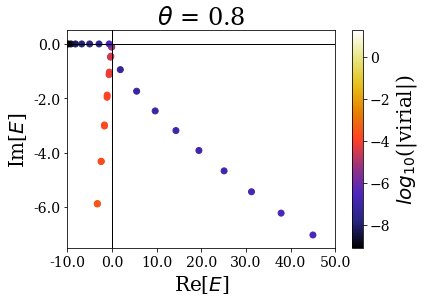

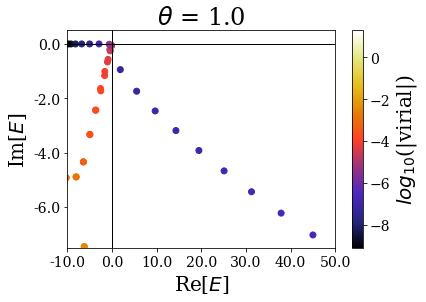

In [8]:
for basis in basissets_tta:
    tit = r"$\theta$ = {}".format(basis.coord_map.theta)
    basis.plot_energies(xlim=(-10, 50), ylim=(-7.5, 0.5), title=tit)

There are many things to be said here:

- Focusing on the $\theta = 0.2$ case, one sees that, if the highest energy resonant states are found with a low virial expectation value, the closest one to the 0 energy are somehow hidden between the other solutions. This is due to the fact that the complex scaling angle is too small for these resonant states to be "unveiled" by the coordinate mapping. There is actually a critical angle $\theta_c$ associated to each resonant state, given by $\theta_c = \frac{\text{arctan}(E_I/E_R)}{2}$, where $E_R$ (respectively $E_I$ is the real (resp. imaginary) part of the resonant state energy. If the complex scaling angle is higher than this number, then the resonant state appear as a single eigenstate:

In [9]:
for i in range(3):
    en = siegerts.resonants[i].energy  # Energy of the resonant state
    theta_c = np.arctan(abs(en.imag / en.real)) / 2  # critical angle
    print("Resonant state n°{}: theta_c = {}".format(i, theta_c))

Resonant state n°0: theta_c = 0.22854546301537398
Resonant state n°1: theta_c = 0.1516923699784277
Resonant state n°2: theta_c = 0.12463899292846521


This explains why the first resonant state does not appear as a single state if $\theta = 0.2$, while all the others appear as single states (because the imaginary part of the resonants states increases more slowly than the real part). For all the higher complex scaling angles, this first resonant state appears as a single eigenstate of the complex scaled Hamiltonian.

Another interesting point is to see that the energies of the "continuum" states close to the 0 energy are rotated proportionnally to the complex scaling angle.

Finally, when the complex scaling angle becomes too high, the bound states (that are not greatly modified by the complex scaling angle otherwise) start exhibiting lower virial expectation values, especially those with the highest energy.

The complex scaling angle therefore has to be chosen so that it is high enough to unveil all the important resonant states while leaving allowing for a good discrimination of the Siegert states.

## Influence of $x_0$

Let us now study the influence of the inlfexion point on the spectrum of the complex scaled Hamiltonians. The same pattern is kept: only $x_0$ is varied, while the other parameters are constant:

### Define the coordinate mappings

In [10]:
theta = 0.6
x0s = [5.0, 5.5, 6.0, 6.5, 7.0]  # Only x0 varies
lbda = 1.5
cms_x0 = [ErfKGCoordMap(theta, x0, lbda, grid=xgrid) for x0 in x0s]

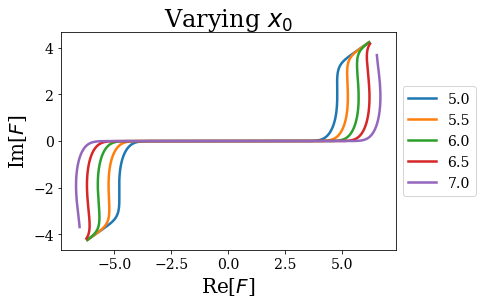

In [29]:
for i, cm in enumerate(cms_x0):
    lab = str(cm.x0)
    plt.plot(np.real(cm.values), np.imag(cm.values), label=lab)
    plt.xlabel("Re[$F$]")
    plt.ylabel("Im[$F$]")
    plt.title(r"Varying $x_0$")
    plt.legend(loc=6, bbox_to_anchor=(1, .5))
plt.show()

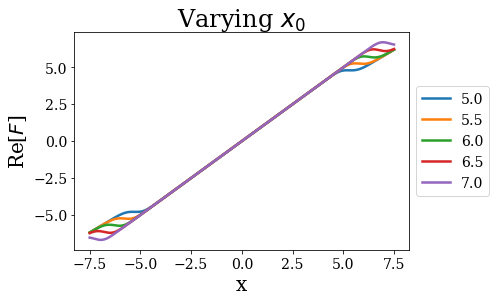

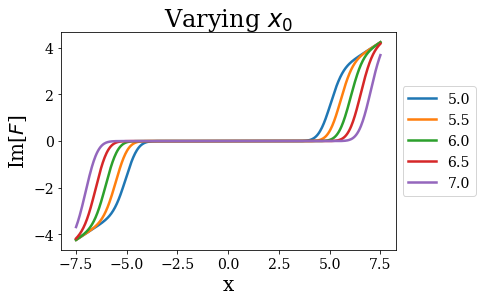

In [42]:
for part in [{"str": "Re", "func": np.real},
             {"str": "Im", "func": np.imag}]:
    for i, cm in enumerate(cms_x0):
        lab = str(cm.x0)
        plt.plot(cm.grid, part["func"](cm.values), label=lab)
        plt.xlabel("x")
        plt.ylabel(part["str"]+"[$F$]")
        plt.title(r"Varying $x_0$")
        plt.legend(loc=6, bbox_to_anchor=(1, .5))
    plt.show()

### Define the Hamiltonians

In [11]:
hams_x0 = [Hamiltonian(pot, cm) for cm in cms_x0]

### Solve the Hamiltonians

In [12]:
basissets_x0 = [ham.solve() for ham in hams_x0]

### Compare the results

Let us first have a look at the global picture, by plotting the energies and virial expectation values of all the eigenstates:

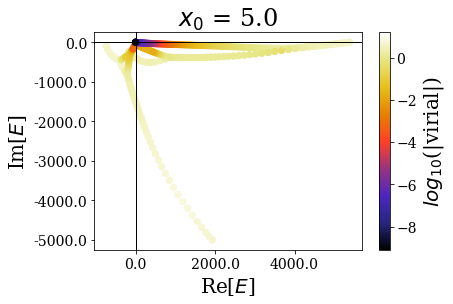

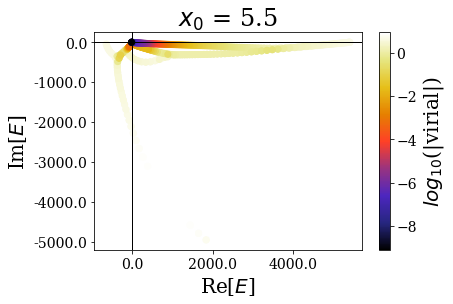

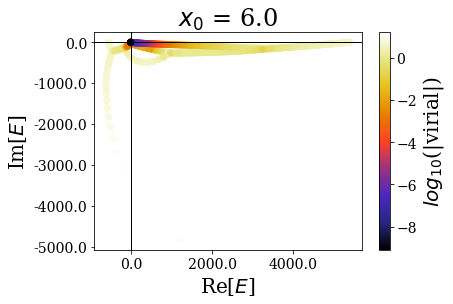

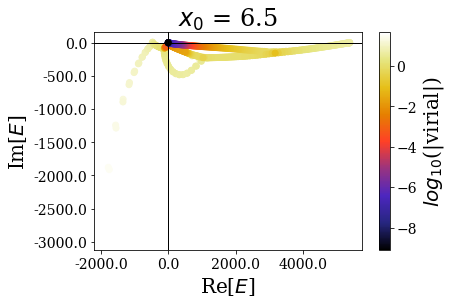

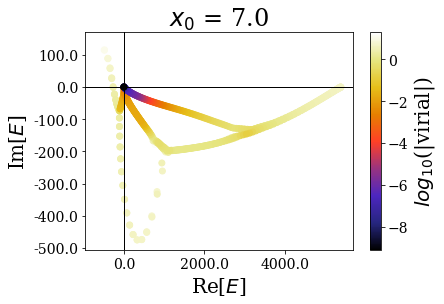

In [13]:
for basis in basissets_x0:
    tit = "$x_0$ = {}".format(basis.coord_map.x0)
    basis.plot_energies(title=tit)

Again, the distribution of the eigenstates varies greatly with $x_0$, but not the real energy range, nor the range of the expectation values of the virial operator.

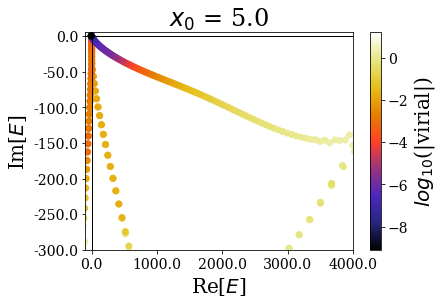

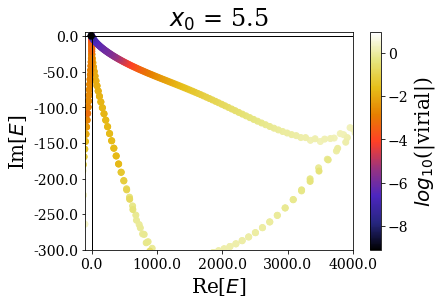

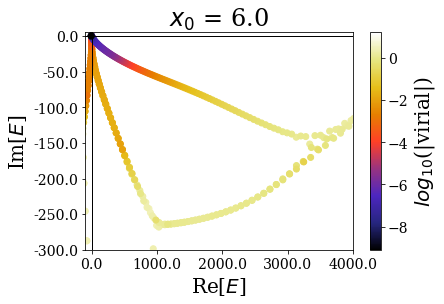

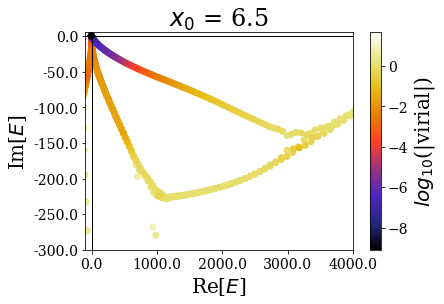

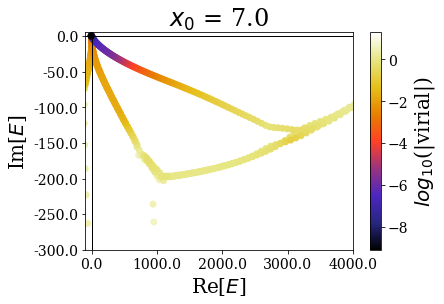

In [14]:
for basis in basissets_x0:
    tit = "$x_0$ = {}".format(basis.coord_map.x0)
    basis.plot_energies(xlim=(-100, 4000), ylim=(-300, 5), title=tit)

Zooming in a little closer shows little modification of the Siegert states spectrum, and this is further evidenced by zooming in even more closely:

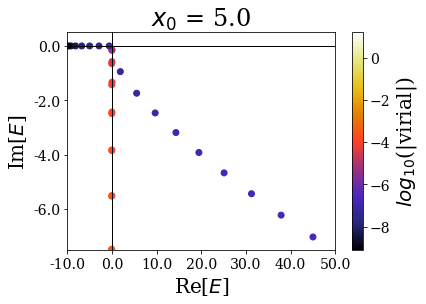

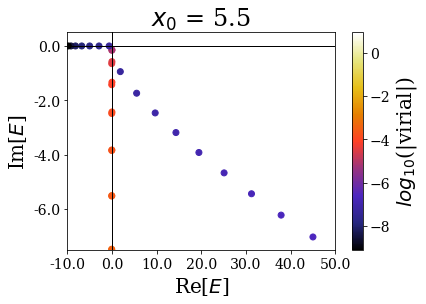

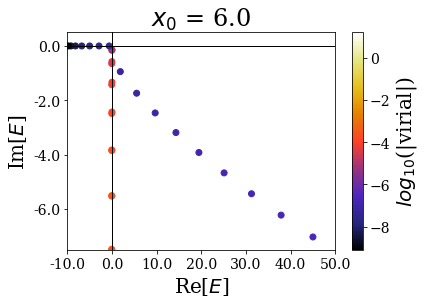

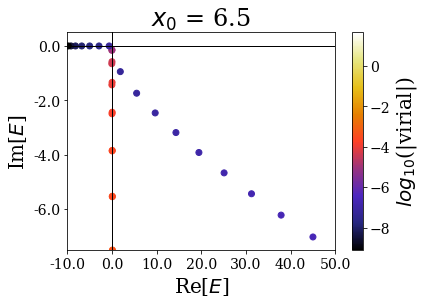

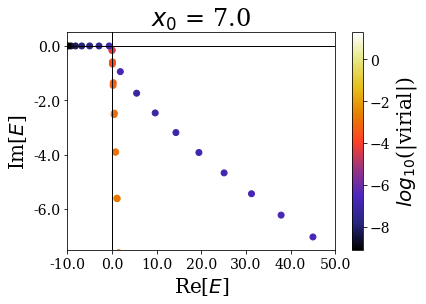

In [15]:
for basis in basissets_x0:
    tit = "$x_0$ = {}".format(basis.coord_map.x0)
    basis.plot_energies(xlim=(-10, 50), ylim=(-7.5, 0.5), title=tit)

It nevertheless seems important to leave a sufficiently large "buffer" region at the end of the discretization grid in order to let the coordinate mapping be fully efficient (a degradatation of the energies and virial values can be observed for $x_0 = 7.0$)

The difference is actually mostly seen on the wavefunctions, especially those of the resonant states:

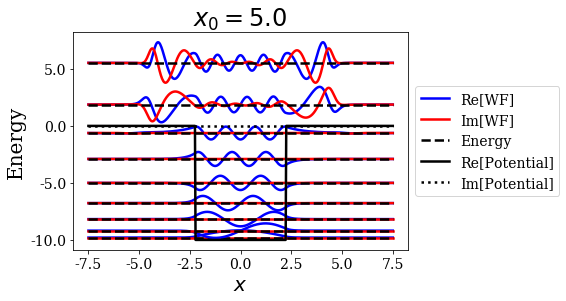

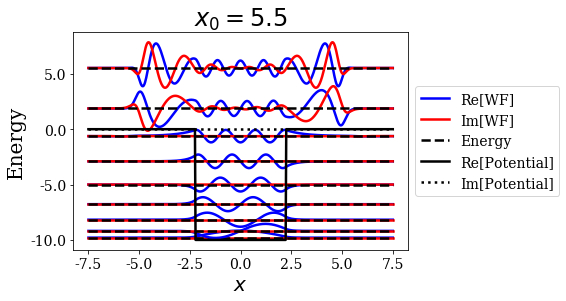

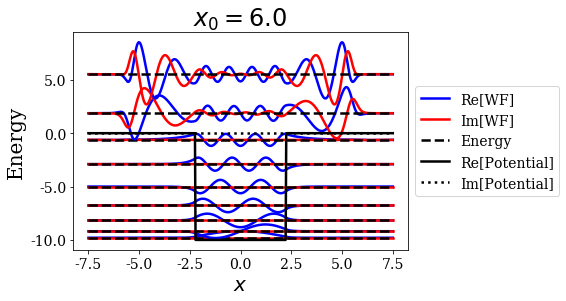

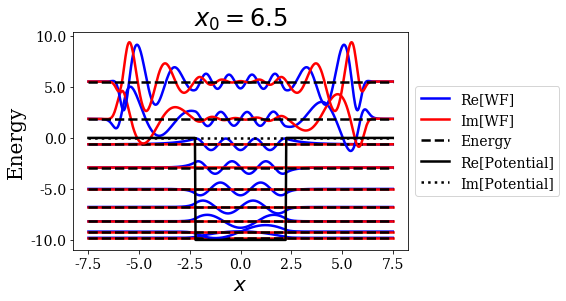

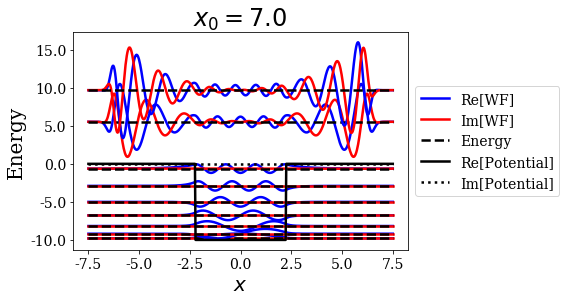

In [16]:
for i, basis in enumerate(basissets_x0):
    basis.max_virial = 10**(-6)
    tit = r"$x_0 = {}$".format(x0s[i])
    basis.plot_wavefunctions(nres=2, title=tit)

The larger the value of $x_0$, the larger the extension of the resonant state wavefunction. This is exactly the role of this parameter, so there is no surprise here.

However, it may have an influence on the bound states wavefunctions, especially for those of highest energy, which have longer exponential tails:

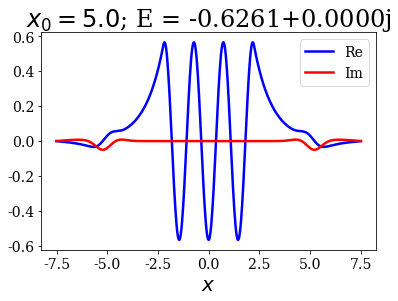

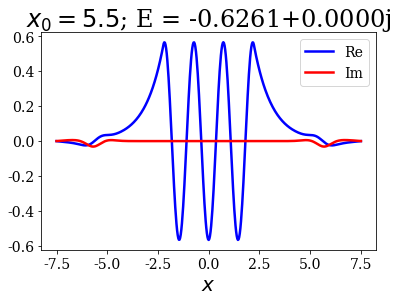

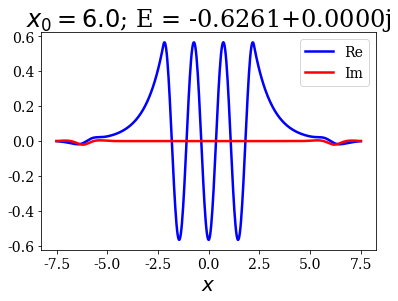

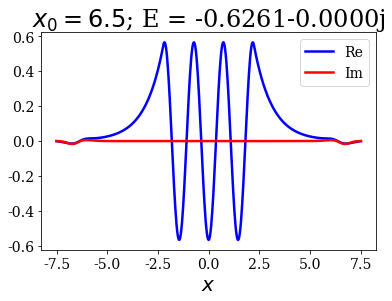

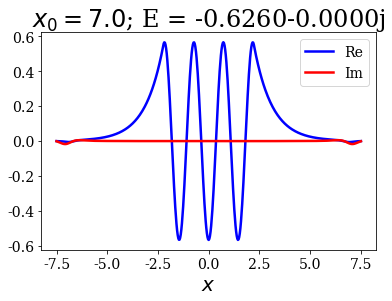

In [17]:
for i, basis in enumerate(basissets_x0):
    basis.max_virial = 10**(-6)
    last_bound = basis.bounds[-1]
    tit = r"$x_0 = {}$; E = {:.4f}".format(x0s[i], last_bound.energy)
    last_bound.plot(title=tit)

This is not a problem since it does not greatly affect the energy and the wavefunctions inside the potential.

## Influence of $\lambda$

Let us finally have a look at the last parameter: the sharpness parameter.

### Define the coordinate mappings

In [18]:
theta = 0.6
x0 = 6.0
lbdas = [0.1, 0.5, 1.5, 2.5, 5.0, 10.0]
cms_lbda = [ErfKGCoordMap(theta, x0, lbda, grid=xgrid) for lbda in lbdas]

For the smallest sharpness value, the coordinate mapping almost corresponds to the uniform coordinate mapping $F: x \mapsto x e^{i \theta}$, while the largest values exhibit sharp transitions:

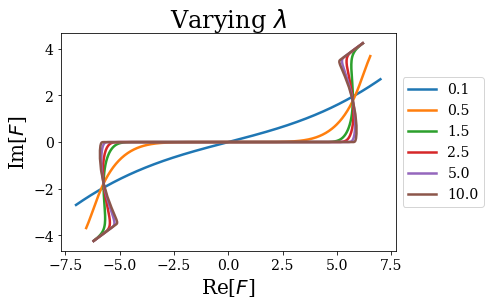

In [28]:
for i, cm in enumerate(cms_lbda):
    lab = str(cm.lbda)
    plt.plot(np.real(cm.values), np.imag(cm.values), label=lab)
    plt.xlabel("Re[$F$]")
    plt.ylabel("Im[$F$]")
    plt.title(r"Varying $\lambda$")
    plt.legend(loc=6, bbox_to_anchor=(1, .5))
plt.show()

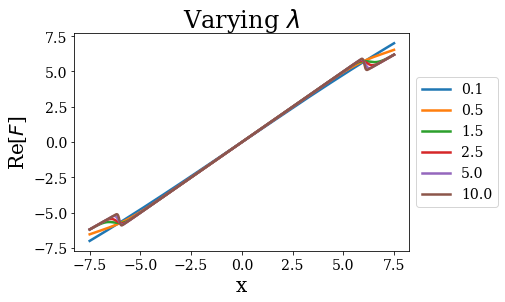

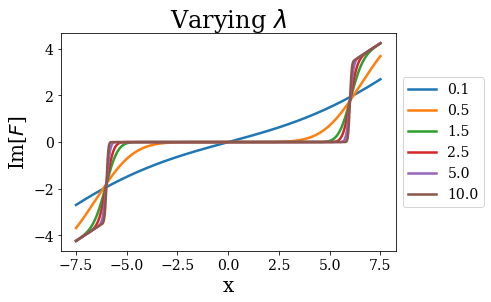

In [43]:
for part in [{"str": "Re", "func": np.real},
             {"str": "Im", "func": np.imag}]:
    for i, cm in enumerate(cms_lbda):
        lab = str(cm.lbda)
        plt.plot(cm.grid, part["func"](cm.values), label=lab)
        plt.xlabel("x")
        plt.ylabel(part["str"]+"[$F$]")
        plt.title(r"Varying $\lambda$")
        plt.legend(loc=6, bbox_to_anchor=(1, .5))
    plt.show()

### Define the Hamiltonians

In [19]:
hams_lbda = [Hamiltonian(pot, cm) for cm in cms_lbda]

### Solve the Hamiltonians

In [20]:
basissets_lbda = [ham.solve() for ham in hams_lbda]

### Compare the results

Let us first have a look at the global picture, by plotting the energies and virial expectation values of all the eigenstates:

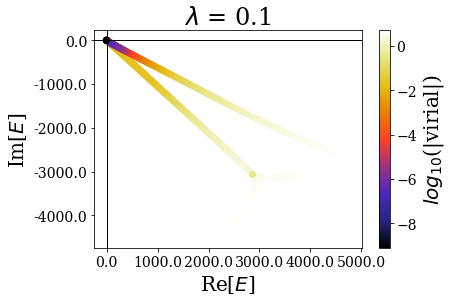

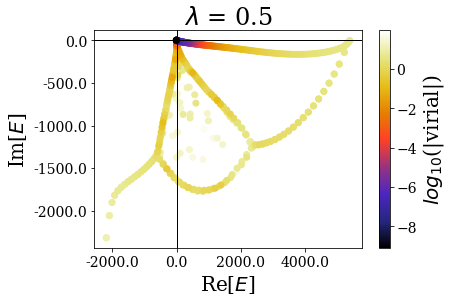

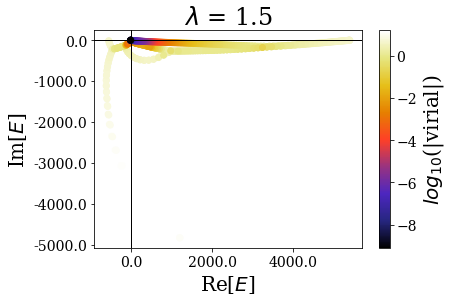

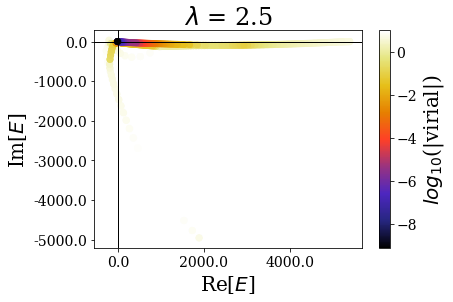

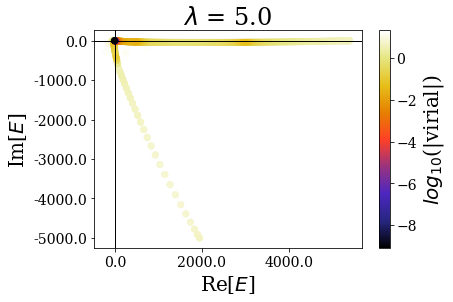

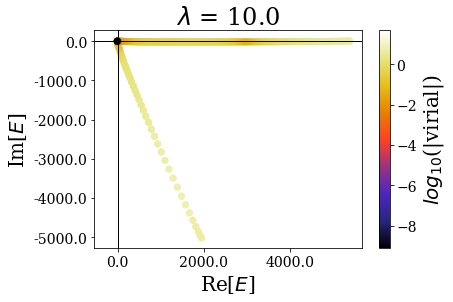

In [21]:
for basis in basissets_lbda:
    tit = "$\lambda$ = {}".format(basis.coord_map.lbda)
    basis.plot_energies(title=tit)

There are two limiting cases: either the sharpness parameter is too large or it is too small, leading to wrong or degraded results, where the bound and/or the resonant states are not well reproduced.

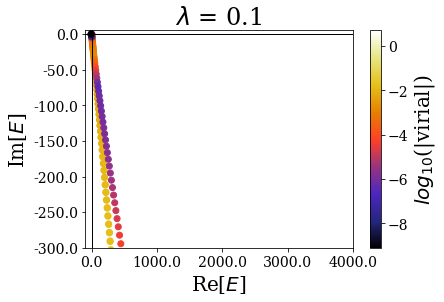

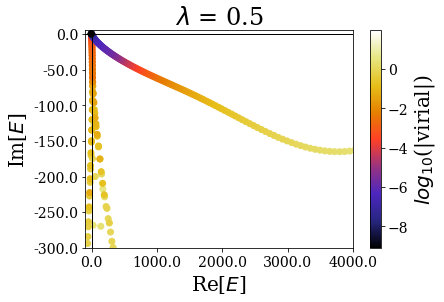

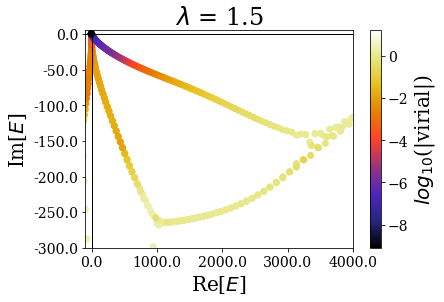

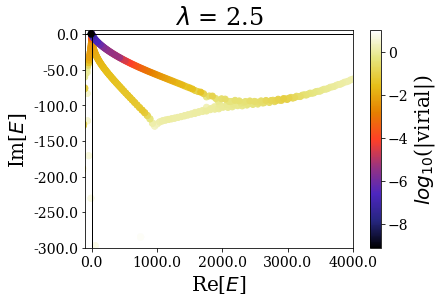

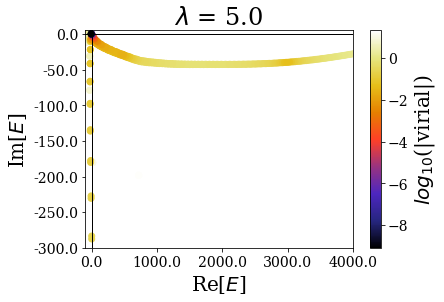

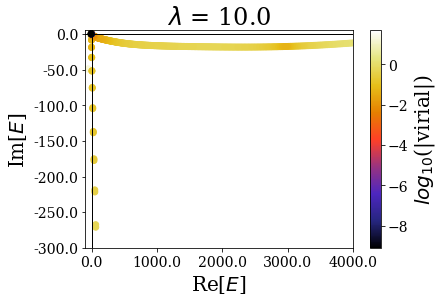

In [22]:
for basis in basissets_lbda:
    tit = "$\lambda$ = {}".format(basis.coord_map.lbda)
    basis.plot_energies(xlim=(-100, 4000), ylim=(-300, 5), title=tit)

By zooming more closely, it appears that if lambda is too small, then the energies can be completelt wrong, while the range of the virial values is consistent with the other calcultions, while, if it gets too large, the range of resonant states get so small that no resonant states can be discriminated from the rest of the states, even though $\theta$ is large enough for the resonant states to be singled-out:

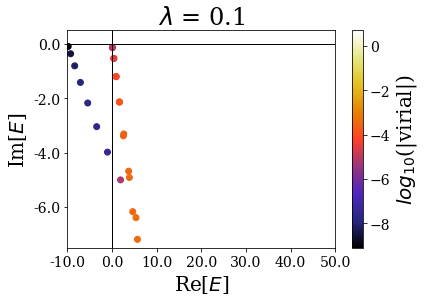

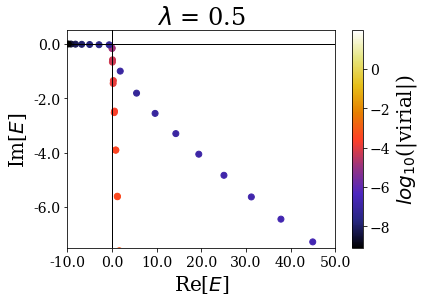

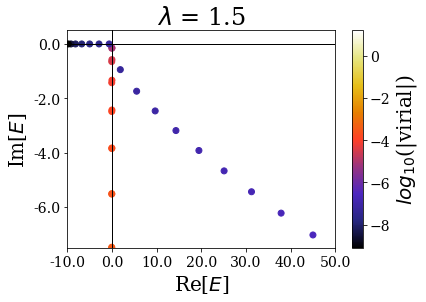

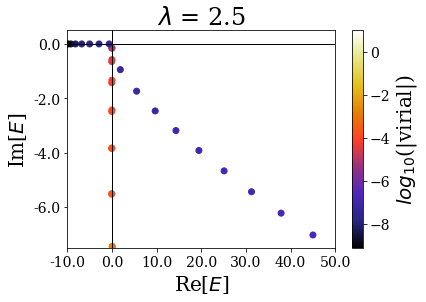

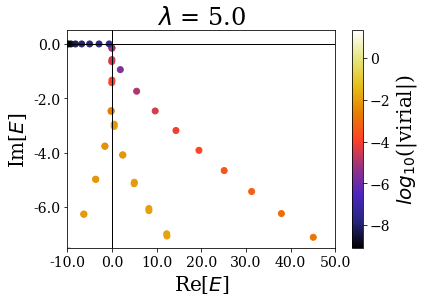

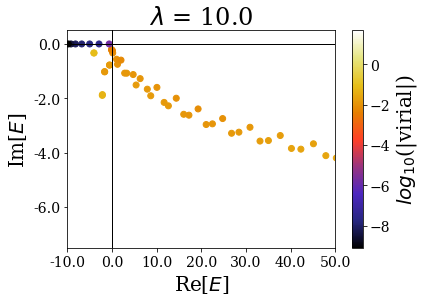

In [44]:
for basis in basissets_lbda:
    tit = "$\lambda$ = {}".format(basis.coord_map.lbda)
    basis.plot_energies(xlim=(-10, 50), ylim=(-7.5, 0.5), title=tit)

The last plot two plots show that a degradation of the virial values or even of the energies can happen if the transition is too sharp.

## Conclusions:

We saw the influence of each parameter on the smooth exterior complex scaling. Let us summarize the main results:

- For $\theta$:

    - if it is too small, some resonant states might be not be singled-out from the rest of the numerical eigenstates ($\theta$ must be larger than the critical angle of the resonant states one is interested in),

    - if it is too large, then the bound and resonant states might be less well reproduced (lower virial values).


- For $x_0$:

    - if it is too large (with respect to the grid extension), then the coordinate mapping cannot tend to its asymptotical value, therefore leading to a degradation of the resutls.

    - On the contrary, if it is too small, then the buffer region is large, and most of the grid points have no use. These cases correspond to a bad use of the computational resources.

- For $\lambda$:

    - if it is too small, the coordinate mapping tends to the uniform complex scaling, and the energies are all aligned.

    - if it is too large, the transition between the absence and the presence of the scaling is too sharp (the coordinate mapping amounts to the bare exterior complex scaling) and the resonant states cannot be singled out the rest of the numerical eigenstates, even though the critical angle is large enough.
    
This shows that one has to be careful with the values of the smooth exterior coordinate mapping parameters, but a generic approach can be defined: make sure that the buffer zone is large enough for the asymptotic values of the coordinate mapping to be reached, with a not too sharp transition aroud $\pm x_0$ and a large enough angle for the resonant states to be singled-out.